In [1]:
## library imports

## db con
from config import get_engine

## data manipulation 
import pandas as pd

## linear algebra 
import numpy as np 

## helper functions
from helper import get_scores, get_win_pcts

## visualization 
import matplotlib.pyplot as plt

In [71]:
## data 

dfs = []

for classification in range(0,4):
    dfs.append(get_scores(classification=classification))
    
## union data 

all_games = pd.concat(dfs,sort=True,axis=0)

## Final Scores

In [3]:
def plot_final_scores(df,**kwargs):
    assert all ([
        
        col in df.columns for col in ['GameID','TeamID','FinalScore']
        
        
    ])
    
    scores = df.groupby(['GameID','TeamID'])[['FinalScore']].max().groupby(['GameID'])['FinalScore'].sum()
    
    
    return scores,scores.plot(kind='hist',**kwargs)

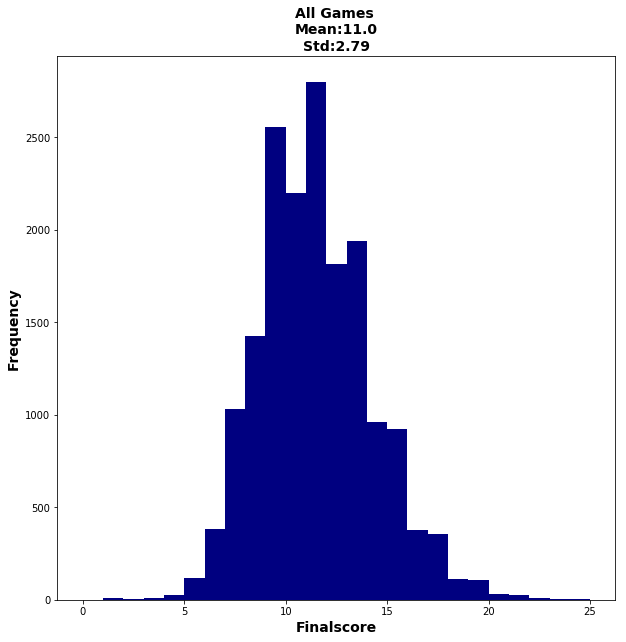

In [4]:
## all linescores

fig,ax = plt.subplots(1,figsize=(10,10))
font_kwargs = {'fontweight':'bold','fontsize':14}

scores = plot_final_scores(all_games,ax=ax,color='navy',bins=range(0,26))[0]

ax.set_xlabel('Finalscore',**font_kwargs)
ax.set_ylabel('Frequency',**font_kwargs)

mean,std = scores.mean(),scores.std()

ax.set_title('All Games \nMean:{}\nStd:{}'.format(round(mean,2),round(std,2)),**font_kwargs)

plt.show()

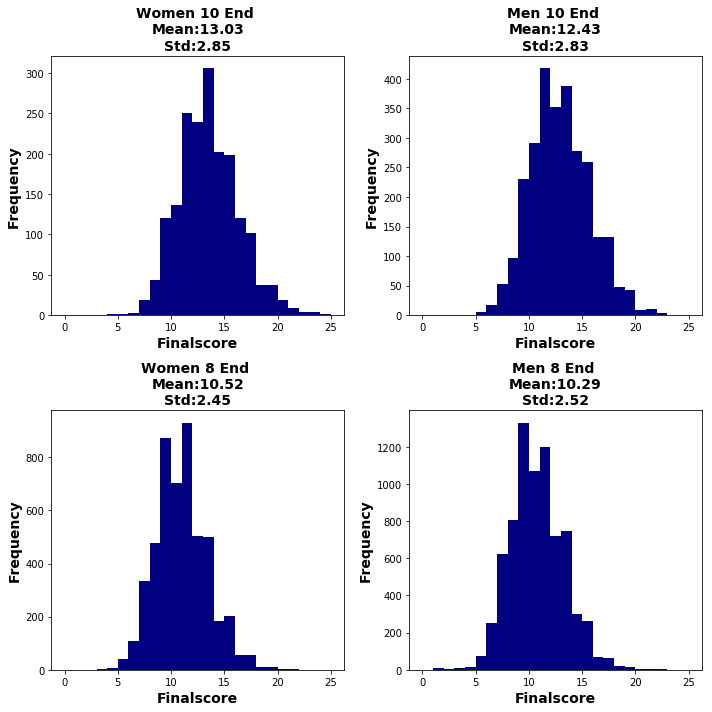

In [5]:
## individual 

fig,axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))

types = ['Women 10 End','Men 10 End','Women 8 End','Men 8 End']

for i, typ in enumerate(types):
    
    df = dfs[i]
    ax = axs.flat[i]
    
    scores = plot_final_scores(df,ax=ax,color='navy',bins=range(0,26))[0]

    ax.set_xlabel('Finalscore',**font_kwargs)
    ax.set_ylabel('Frequency',**font_kwargs)

    mean,std = scores.mean(),scores.std()

    ax.set_title('{} \nMean:{}\nStd:{}'.format(typ,round(mean,2),round(std,2)),**font_kwargs)

plt.tight_layout()
plt.show()

## End Results

In [6]:
def plot_end_results(df,**kwargs):
    assert all([
        
        col in df.columns for col in ['GameID','EndResult','EndNum']
        
    ])
    
    results = df.groupby(['GameID','EndNum'])['EndResult'].max()
    
    weights = [1/len(results)]*len(results)
    
    kwargs['weights']=weights
    
    return results, results.plot(kind='hist',**kwargs)

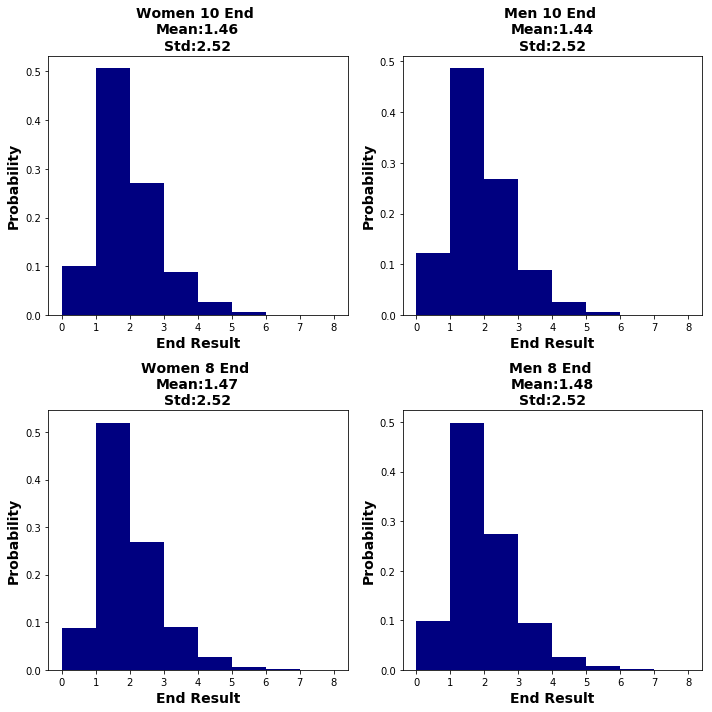

In [7]:
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

for i, typ in enumerate(types):
    ax = axs.flat[i]
    df = dfs[i]
    
    results = plot_end_results(df=df,bins=range(0,9),ax=ax,color='navy')[0]
    
    ax.set_xlabel('End Result',**font_kwargs)
    ax.set_ylabel('Probability',**font_kwargs)
    
    mean,std = results.mean(),scores.std()

    ax.set_title('{} \nMean:{}\nStd:{}'.format(typ,round(mean,2),round(std,2)),**font_kwargs)

plt.tight_layout()
plt.show()
    

## Points Scored 

In [113]:
def plot_pts_scored(df,ax,ticks,width,**kwargs):
    assert all([
        
        col in df.columns for col in ['EndNum','EndResult','Hammer']
        
    ])
    
    
    _df = df.copy()
    _df = _df.loc[(_df.EndResult > 0)&(_df.EndNum <=11)]
    
    pts_scored = _df.groupby(['EndNum','Hammer'],as_index=False)[['EndResult']].sum()
    
    all_pts_scored = pts_scored.groupby(['EndNum'],as_index=False)[['EndResult']].sum().rename({'EndResult':'TotalPoints'},axis=1)
    
    pts_scored = pts_scored.merge(all_pts_scored,on=['EndNum'])
    
    pts_scored['Pct'] = pts_scored['EndResult']/pts_scored['TotalPoints']
    


    ax.bar(x=[tick for tick in ticks ],height=pts_scored.loc[pts_scored.Hammer == 1]['Pct'],width=width,color='navy',**kwargs)
    ax.bar(x=[tick+width for tick in ticks],height=pts_scored.loc[pts_scored.Hammer == 0]['Pct'],width=width,color='black',**kwargs)

    ax.set_ylim(0,1)
    ax.set_xticks([tick+.075 for tick in ticks ])
    ax.set_xticklabels(labels = ["{}".format(tick+1) for tick in ticks],fontsize=10)
    ax.tick_params(axis='x',rotation=90,labelsize=14)
    ax.tick_params(axis='y',labelsize=14)
    
    hammer_pts = pts_scored.loc[pts_scored.Hammer == 1].EndResult.sum() / pts_scored.EndResult.sum()
    steal_pts = pts_scored.loc[pts_scored.Hammer == 0].EndResult.sum() / pts_scored.EndResult.sum()
    return hammer_pts, steal_pts


    

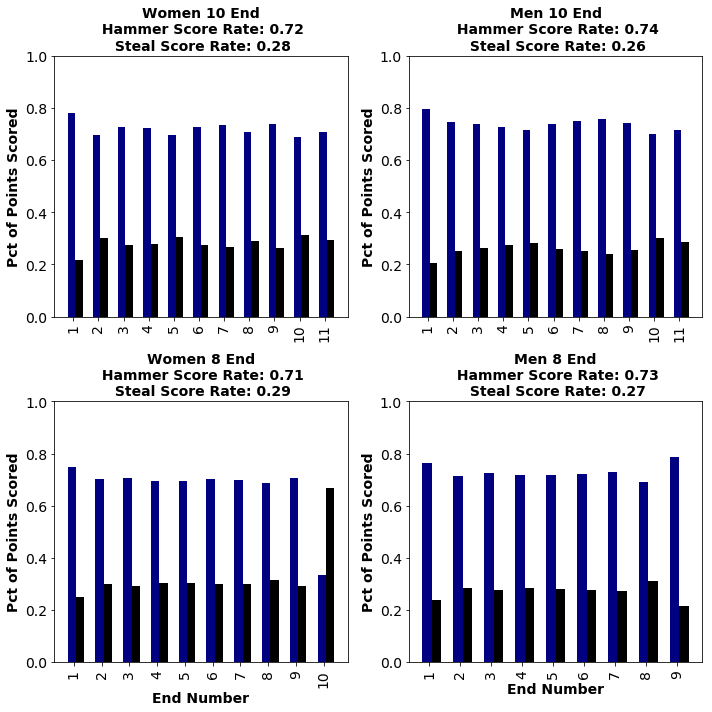

In [114]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

## women 10 end
ax = axs.flat[0]
hammer_pts, steal_pts = plot_pts_scored(dfs[0],ax=ax,width=0.3,ticks=range(0,11))
ax.set_ylabel("Pct of Points Scored",font_kwargs)
ax.set_title("{}\n Hammer Score Rate: {}\n Steal Score Rate: {}".format(types[0],round(hammer_pts,2),round(steal_pts,2)),**font_kwargs)

## men 10 end
ax = axs.flat[1]
hammer_pts, steal_pts = plot_pts_scored(dfs[1],ax=ax,width=0.3,ticks=range(0,11))
ax.set_ylabel("Pct of Points Scored",font_kwargs)
ax.set_title("{}\n Hammer Score Rate: {}\n Steal Score Rate: {}".format(types[1],round(hammer_pts,2),round(steal_pts,2)),**font_kwargs)

## women 8 end
ax = axs.flat[2]
hammer_pts, steal_pts = plot_pts_scored(dfs[2],ax=ax,width=0.3,ticks=range(0,10))
ax.set_ylabel("Pct of Points Scored",font_kwargs)
ax.set_title("{}\n Hammer Score Rate: {}\n Steal Score Rate: {}".format(types[2],round(hammer_pts,2),round(steal_pts,2)),**font_kwargs)
ax.set_xlabel('End Number',**font_kwargs)

## men 8 end
ax = axs.flat[3]
hammer_pts, steal_pts = plot_pts_scored(dfs[3],ax=ax,width=0.3,ticks=range(0,9))
ax.set_ylabel("Pct of Points Scored",**font_kwargs)
ax.set_title("{}\n Hammer Score Rate: {}\n Steal Score Rate: {}".format(types[3],round(hammer_pts,2),round(steal_pts,2)),**font_kwargs)
ax.set_xlabel('End Number',**font_kwargs)


plt.tight_layout()
plt.show()

## End Expected Score

In [115]:
def get_expected_score(df,ax,ticks,width,spacing,**kwargs):
    assert all([
        
        col in df.columns for col in ['EndNum','EndResult']
        
    ])
    
    _df = df.copy()
    _df = _df.loc[_df.EndResult >=0]
    
    end_expected_scores = _df.groupby(['EndNum'])['EndResult'].mean()
    

    

    x = [tick+spacing for tick in ticks]
    height = end_expected_scores
    ax.bar(x=x,height=height,width=width,**kwargs)
    
    return

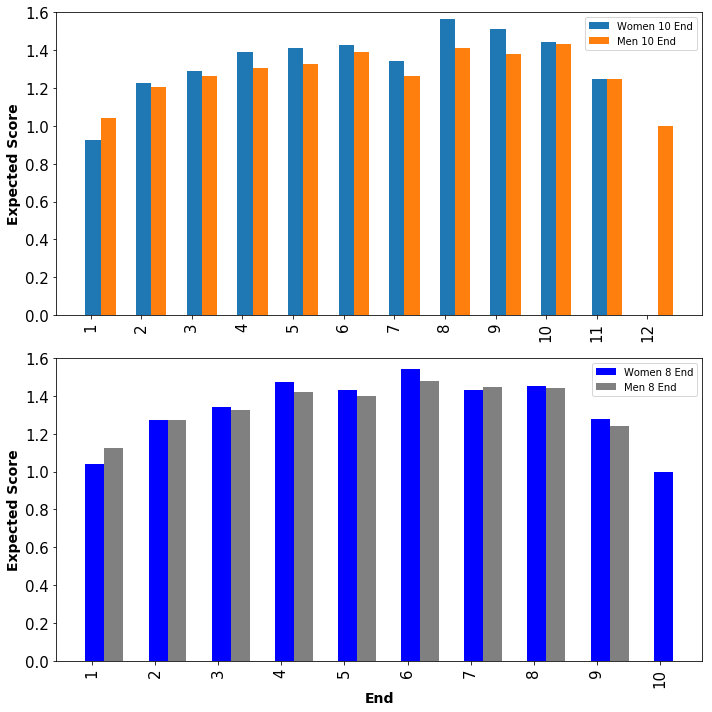

In [121]:
fig,axs = plt.subplots(nrows=2,figsize=(10,10))

## 10 end
ax = axs.flat[0]

get_expected_score(dfs[0],ax=ax,ticks=range(0,11),width=0.3,spacing=0.3)
get_expected_score(dfs[1],ax=ax,ticks=range(0,12),width=0.3,spacing=0.6)

ax.set_xticks([i+.25 for i in range(12)])
ax.set_xticklabels(labels = ["{}".format(i+1) for i in range(12)],fontsize=15)
ax.tick_params(axis='x',rotation=90)
ax.set_ylim(0,1.6)
ax.set_ylabel("Expected Score",**font_kwargs)
ax.set_yticks([_ for _ in np.arange(0,1.8,0.2)])
ax.set_yticklabels(labels =["{}".format(round(_,2)) for _ in np.arange(0,1.8,0.2)],fontsize=15)
ax.legend([types[i] for i in range(2)])


## 8 end
ax = axs.flat[1]

get_expected_score(dfs[2],ax=ax,ticks=range(0,10),width=0.3,spacing=0.3,color='Blue')
get_expected_score(dfs[3],ax=ax,ticks=range(0,9),width=0.3,spacing=0.6,color='Grey')

ax.set_xticks([i+.25 for i in range(10)])
ax.set_xticklabels(labels = ["{}".format(i+1) for i in range(10)],fontsize=15)
ax.tick_params(axis='x',rotation=90)
ax.set_ylim(0,1.6)
ax.set_ylabel("Expected Score",**font_kwargs)
ax.set_yticks([_ for _ in np.arange(0,1.8,0.2)])
ax.set_yticklabels(labels =["{}".format(round(_,2)) for _ in np.arange(0,1.8,0.2)],fontsize=15)
ax.legend([types[i] for i in range(2,4)])

ax.set_xlabel("End",**font_kwargs)

plt.tight_layout()
plt.show()